## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_folder = './data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

In [3]:
us_2015 = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [37]:
us_2015.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


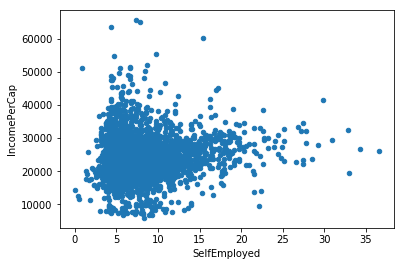

In [5]:
us_2015.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')

In [7]:
us_2015[['SelfEmployed', 'IncomePerCap']].corr(method ='pearson')

,SelfEmployed,IncomePerCap
SelfEmployed,1.000000,0.087274
IncomePerCap,0.087274,1.000000


In [10]:
set_A = us_2015[(us_2015.State == 'Wisconsin') |  (us_2015.State == 'Tennessee') | (us_2015.State == 'Minnesota')]

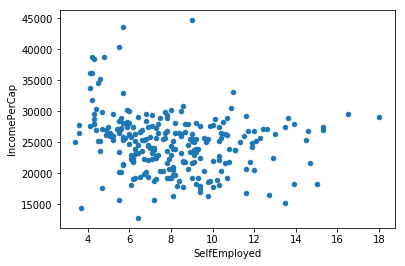

In [12]:
set_A.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')

In [15]:
set_A[['SelfEmployed', 'IncomePerCap']].corr(method ='pearson')

,SelfEmployed,IncomePerCap
SelfEmployed,1.000000,-0.202294
IncomePerCap,-0.202294,1.000000


In [27]:
set_A[['SelfEmployed', 'IncomePerCap']].describe(percentiles = [.01, .1, .25, .5, .75, 0.9, .99])

,SelfEmployed,IncomePerCap
count,254.000000,254.000000
mean,8.055512,24918.066929
std,2.691729,4755.868087
min,3.400000,12810.000000
1%,3.653000,15435.060000
10%,4.830000,18989.900000
25%,6.025000,21850.500000
50%,7.800000,25327.500000
75%,9.550000,27472.000000
90%,11.670000,29522.400000


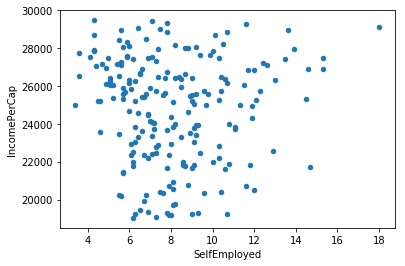

In [50]:
set_A_wo_outliers = set_A[(set_A.IncomePerCap <= 29522.4) & (set_A.IncomePerCap >= 18989.9)]
set_A_wo_outliers.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')

In [51]:
set_A_wo_outliers[['SelfEmployed', 'IncomePerCap']].corr(method ='pearson')

,SelfEmployed,IncomePerCap
SelfEmployed,1.000000,-0.010229
IncomePerCap,-0.010229,1.000000


In [52]:
set_A_wo_outliers[['SelfEmployed', 'IncomePerCap']]\
.describe(percentiles = [.01, .1, .25, .5, .75, 0.9, .99])

,SelfEmployed,IncomePerCap
count,202.000000,202.000000
mean,8.112376,24762.000000
std,2.577900,2785.719038
min,3.400000,19027.000000
1%,3.605000,19166.120000
10%,5.220000,20410.800000
25%,6.200000,22528.750000
50%,7.800000,25327.500000
75%,9.400000,26913.000000
90%,11.690000,28061.200000


,SelfEmployed,IncomePerCap
SelfEmployed,1.000000,-0.478863
IncomePerCap,-0.478863,1.000000


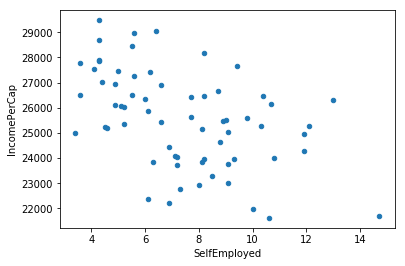

In [53]:
set_A_wo_outliers[set_A_wo_outliers.State == 'Wisconsin'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
set_A_wo_outliers[set_A_wo_outliers.State == 'Wisconsin'][['SelfEmployed', 'IncomePerCap']].corr(method ='pearson')

,SelfEmployed,IncomePerCap
SelfEmployed,1.000000,-0.201332
IncomePerCap,-0.201332,1.000000


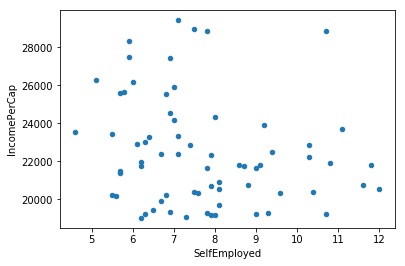

In [54]:
set_A_wo_outliers[set_A_wo_outliers.State == 'Tennessee'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
set_A_wo_outliers[set_A_wo_outliers.State == 'Tennessee'][['SelfEmployed', 'IncomePerCap']].corr(method ='pearson')

,SelfEmployed,IncomePerCap
SelfEmployed,1.000000,0.184605
IncomePerCap,0.184605,1.000000


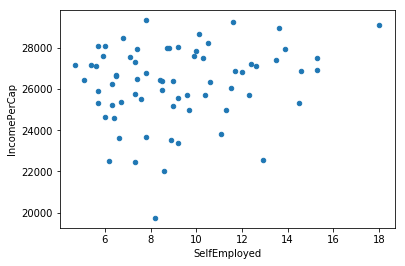

In [55]:
set_A_wo_outliers[set_A_wo_outliers.State == 'Minnesota'].plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')
set_A_wo_outliers[set_A_wo_outliers.State == 'Minnesota'][['SelfEmployed', 'IncomePerCap']].corr(method ='pearson')

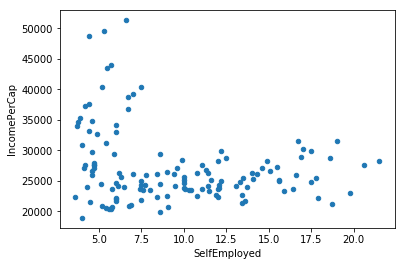

In [56]:
set_B = us_2015[(us_2015.State == 'New Jersey') |  (us_2015.State == 'Kansas') | (us_2015.State == 'Rhode Island')]
set_B.plot.scatter(x = 'SelfEmployed', y = 'IncomePerCap')

In [57]:
set_B[['SelfEmployed', 'IncomePerCap']].corr(method ='pearson')

,SelfEmployed,IncomePerCap
SelfEmployed,1.000000,-0.232221
IncomePerCap,-0.232221,1.000000


In [58]:
set_B[['SelfEmployed', 'IncomePerCap']].describe(percentiles = [.01, .1, .25, .5, .75, 0.9, .99])

,SelfEmployed,IncomePerCap
count,131.000000,131.000000
mean,9.568702,27146.549618
std,4.549422,6073.105217
min,3.600000,18912.000000
1%,3.730000,19970.100000
10%,4.500000,21677.000000
25%,5.750000,23524.500000
50%,8.600000,25484.000000
75%,12.350000,28564.500000
90%,16.600000,34824.000000


In [59]:
set_B_wo_outliers = set_B[(set_B.IncomePerCap <= 34824.0) & (set_B.IncomePerCap >= 21677.0)]

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

### TASK 2A
_Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding)._

In [5]:
# Loading the dataset
aac = pd.read_csv(data_folder + 'aac_intakes_outcomes.csv.zip', compression = 'zip')

# Keep relevant columns only
aac = aac[['animal_type','intake_year','intake_condition','intake_number','intake_type','sex_upon_intake',
          'age_upon_intake_(years)','time_in_shelter_days','sex_upon_outcome','age_upon_outcome_(years)',
          'outcome_type']]

In [4]:
aac.head()

,animal_type,intake_year,intake_condition,intake_number,intake_type,sex_upon_intake,age_upon_intake_(years),time_in_shelter_days,sex_upon_outcome,age_upon_outcome_(years),outcome_type
0,Dog,2017,Normal,1.0,Stray,Neutered Male,10.0,0.588194,Neutered Male,10.0,Return to Owner
1,Dog,2014,Normal,2.0,Public Assist,Neutered Male,7.0,1.259722,Neutered Male,7.0,Return to Owner
2,Dog,2014,Normal,3.0,Public Assist,Neutered Male,6.0,1.113889,Neutered Male,6.0,Return to Owner
3,Dog,2014,Normal,1.0,Owner Surrender,Neutered Male,10.0,4.970139,Neutered Male,10.0,Transfer
4,Dog,2013,Injured,1.0,Public Assist,Neutered Male,16.0,0.119444,Neutered Male,16.0,Return to Owner


In [6]:
# Define features x and outcome y
x = aac.drop(axis=1, labels='outcome_type')
y = aac[['outcome_type']]

# Convert outcome to either Adoption (1) or No Adoption (0)
y_adopt = y[y['outcome_type'] == 'Adoption']
y_not_adopt = y[y['outcome_type'] != 'Adoption']
y_adopt['Outcome'], y_not_adopt['Outcome'] = 1, 0
y_adopt, y_not_adopt = y_adopt[['Outcome']], y_not_adopt[['Outcome']]

y = pd.concat([y_adopt,y_not_adopt])
y.sort_index(axis=0,ascending=True, inplace = True);

# Dummy variables encoding
x = pd.get_dummies(x)

In [6]:
print(y.shape, x.shape)

(79672, 1) (79672, 32)


_Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome type is adoption or not._

In [7]:
def split_data(x, y, ratio, myseed=1):
    """ Split the dataset in function of the split ratio """
    
    # The data should be splited randomly in order to avoid any perturbation which
    # could be caused by the original order of the data
    np.random.seed(myseed)
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_train, index_test = indices[: index_split], indices[index_split:]
    
    # Create to splitted sets (train and test)
    x_train, x_test = x.iloc[index_train], x.iloc[index_test]
    y_train, y_test = y.iloc[index_train], y.iloc[index_test]

    return x_train, x_test, y_train, y_test

# Split the data set in train set and test set
x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8)

_Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas._

In [8]:
# Standardisation : x' = (x - mean)/std
mean_tr = np.mean(x_tr, axis=0)
std_tr = np.std(x_tr, axis=0)
x_tr = (x_tr - mean_tr) / std_tr
x_te = (x_te - mean_tr) / std_tr

In [9]:
x_tr.head()

,intake_year,intake_number,age_upon_intake_(years),time_in_shelter_days,age_upon_outcome_(years),animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
63044,1.199993,-0.276527,-0.036183,-0.402772,-0.048219,-0.065948,-0.768248,-1.148099,4.109571,-0.062878,...,-0.649349,-0.683996,-0.435801,-0.402206,3.264082,-0.361039,-0.373802,-0.743085,-0.686815,3.264082
48857,0.433106,-0.276527,-0.382544,-0.236281,-0.393704,-0.065948,1.301663,-1.148099,-0.243334,-0.062878,...,-0.649349,1.461997,-0.435801,-0.402206,-0.306365,-0.361039,-0.373802,1.345740,-0.686815,-0.306365
77854,1.966880,-0.276527,-0.382544,-0.402488,-0.393704,-0.065948,-0.768248,-1.148099,4.109571,-0.062878,...,-0.649349,-0.683996,-0.435801,-0.402206,3.264082,-0.361039,-0.373802,-0.743085,-0.686815,3.264082
65109,1.199993,-0.276527,-0.724159,-0.396979,-0.734458,-0.065948,-0.768248,0.871005,-0.243334,-0.062878,...,-0.649349,1.461997,-0.435801,-0.402206,-0.306365,-0.361039,2.675214,-0.743085,-0.686815,-0.306365
19219,-1.100668,-0.276527,1.002897,0.145371,0.988239,-0.065948,-0.768248,0.871005,-0.243334,-0.062878,...,-0.649349,-0.683996,2.294626,-0.402206,-0.306365,-0.361039,-0.373802,1.345740,-0.686815,-0.306365


### TASK 2B

_Train a logistic regression classifier on your training set._

In [10]:
logistic = LogisticRegression(solver='newton-cg')

In [11]:
logistic.fit(x_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

_Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix._

In [12]:
def predict_labels(probas, threshold = 0.5):
    """ Dichotomic classification of prediction, given a specific threshold and raw probabilities. """
    
    probas[np.where(probas <= threshold)] = 0
    probas[np.where(probas
                    > threshold)] = 1
    
    return probas

# Establish the predicted output for the test set thanks to the logistic regression trained on train set
pred = predict_labels(logistic.predict_proba(x_te))
pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [13]:
def confusion_matrix(pred, y):
    """ Compare pred and y in order to determine the values of the confusion matrix """
    
    df_pred = pd.DataFrame({'Prediction':pred[:,1]})
    df = df_pred.join(y)
    tp = len(df[(df.Prediction == 1) & (df.Outcome == 1)]) # True positive
    tn = len(df[(df.Prediction == 0) & (df.Outcome == 0)]) # True negative
    fp = len(df[(df.Prediction == 1) & (df.Outcome == 0)]) # False positive
    fn = len(df[(df.Prediction == 0) & (df.Outcome == 1)]) # False negative
    
    return tp, tn, fp, fn

# Establish the confusion matrix to check the efficiency of the model
tp, tn, fp, fn = confusion_matrix(pred, y_te)
confusion = {'Pred = 0': {'y = 1' : fn, 'y = 0' : tn}, 'Pred = 1' : {'y = 1' : tp, 'y = 0' : fp} }
df_confusion = pd.DataFrame.from_dict(confusion)
df_confusion.head()

,Pred = 0,Pred = 1
y = 0,1104,939
y = 1,622,533


Where 1 means 'Adoption' and 0 means 'No Adoption'

_Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class._

In [14]:
def get_stats(tp, tn, fp, fn):
    ''' Display accuracy, precision, recall and f1-score, given confusion matrix values'''
    
    # Accuracy = TP+TN/TP+FP+FN+TN
    if (tp+fp+fn+tn) > 0:
        accuracy = (tp+tn)/(tp+fp+fn+tn)
    else :
        accurancy = 0
    # Precision = TP/TP+FP
    if (tp+fp) > 0:
        precision = tp/(tp+fp)
    else :
        precision = 0
    # Recall = TP/TP+FN
    if (tp+fn) > 0:
        recall = tp/(tp+fn)
    else : 
        recall = 0
    # F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    if (recall+precision) > 0:
        f1_score = 2*(recall*precision)/(recall+precision)
    else :
        f1_score = 0
     
    return accuracy, precision, recall, f1_score

accuracy, precision, recall, f1_score = get_stats(tp, tn, fp, fn)

# Display stats for threshold at 0.5
print(" Accuracy : {}\n Precision : {}\n Recall : {}\n F1 Score : {}\n".\
          format(str(accuracy)[:6],str(precision)[:6],str(recall)[:6],str(f1_score)[:6]))

 Accuracy : 0.5118
 Precision : 0.3620
 Recall : 0.4614
 F1 Score : 0.4057



_Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold._

In [15]:
thresholds = np.linspace(0,1-1e-9,999)
accuracies, precisions, recalls, f1_scores = [], [], [], []

for threshold in thresholds:
    tp, tn, fp, fn = confusion_matrix(predict_labels(logistic.predict_proba(x_te), threshold), y_te)
    accuracy, precision, recall, f1_score = get_stats(tp, tn, fp, fn)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    
stats = {
    'Threshold' : thresholds,
    'Accuracy' : accuracies,
    'Precision' : precisions,
    'Recall' : recalls,
    'F1_Scores' : f1_scores
}

df_stats = pd.DataFrame.from_dict(stats)

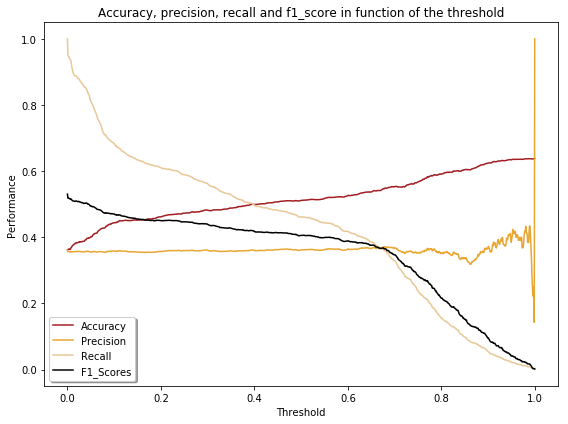

In [16]:
# Plot the accuracy, precision, recall and f1_score in function of the threshold
y1_plot = df_stats['Accuracy'].values
y2_plot = df_stats['Precision'].values
y3_plot = df_stats['Recall'].values
y4_plot = df_stats['F1_Scores'].values
x_plot = df_stats['Threshold'].values

fig, ax = plt.subplots(figsize=(8, 6))
index = range(len(y1_plot))

# Plot each parameter with color-blind friendly colors
ax.plot(x_plot, y1_plot, label='Accuracy', color='#A11E22')
ax.plot(x_plot, y2_plot, label='Precision', color='#E8A631')
ax.plot(x_plot, y3_plot, label='Recall', color='#E8C898')
ax.plot(x_plot, y4_plot, label='F1_Scores', color='#000000')

# Aesthetic adjustments
ax.legend(shadow=True)
ax.set_xlabel('Threshold')
ax.set_ylabel('Performance')
ax.set_title('Accuracy, precision, recall and f1_score in function of the threshold')
fig.tight_layout()

plt.savefig("Performance_threshold")
plt.show()

_The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning._

We would use recall. Indeed, recall (TP/TP+FN) has the advantage to emphasize the importance of false negative in the computation. For ethical reasons, we want to minimize the number of animals who are slept, but who would have been adopted if they were not. This means, we want to minimize the number of false negative.

### TASK C
_Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30._

In [17]:
def greedy_backward_selection(k, n, x, y):
    ''' Only keep the k most important coefs for logistic regression on x '''
    x_ = x
    iterations = n-k
    
    # As the columns were standardized, we can just remove the smaller weights each time
    for j in range(iterations):
        x_tr_, x_te_, y_tr_, y_te_ = split_data(x_, y, 0.8)
        logistic = LogisticRegression(solver='newton-cg')
        logistic.fit(x_tr_, y_tr_)
        x_ = x_.drop(axis=1, labels=x_.columns[np.argmin(abs(logistic.coef_[0]))])
        
    return x_

In [18]:
def form_k_indices(y, k_fold=5, seed=12):
    """ Build k indices for k-fold (5-fold by default) """
    
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    
    return np.array(k_indices)

def cross_validation(x, y, k_indices, k, threshold=0.5):
    """ Return the recall of the logistic regression """
    
    # Get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te_, y_tr_ = y.iloc[te_indice], y.iloc[tr_indice]
    x_te_, x_tr_ = x.iloc[te_indice], x.iloc[tr_indice]

    # Perform logistic regression on the cross-validation set
    logistic = LogisticRegression(solver='newton-cg')
    logistic.fit(x_tr_, y_tr_)
    
    # Establish prediction
    pred = predict_labels(logistic.predict_proba(x_te_), threshold)
    
    # Compute confusion matrix values
    tp, tn, fp, fn = confusion_matrix(pred, y_te_)
    
    # Evaluate performance with recall indicator
    accuracy, precision, recall, f1_score = get_stats(tp, tn, fp, fn)

    return accuracy, precision, recall, f1_score    
    

In [ ]:
k_s = [1, 5, 10, 15, 20, 25, 30]

# Split data in 5-fold
k_indices = form_k_indices(y)
performance = []
k_fold = 5
N_features = len(logistic.coef_[0])

for k_ in k_s:
    x_ = greedy_backward_selection(k_, N_features, x, y)
    
    accuracy, precision, recall, f1_score = [], [], [], []
    # Cross validation
    for k in range(k_fold):
        accuracy_, precision_, recall_, f1_score_ = cross_validation(x_, y, k_indices, k)
        accuracy.append(accuracy_)
        precision.append(precision_)
        recall.append(recall_)
        f1_score.append(f1_score_)
        
    performance.append([np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(f1_score)])

In [ ]:
p = np.asarray(performance).T

In [ ]:
p[:,0]

In [ ]:
# Plot the accuracy, precision, recall and f1_score in function of the threshold
y1_plot, y2_plot, y3_plot, y4_plot = p[0], p[1], p[2], p[3]
x_plot = k_s

fig, ax = plt.subplots(figsize=(8, 6))
index = range(len(y1_plot))

# Plot each parameter with color-blind friendly colors
ax.plot(x_plot, y1_plot, label='Accuracy', color='#A11E22')
ax.plot(x_plot, y2_plot, label='Precision', color='#E8A631')
ax.plot(x_plot, y3_plot, label='Recall', color='#E8C898')
ax.plot(x_plot, y4_plot, label='F1_Scores', color='#000000')

# Aesthetic adjustments
ax.legend(shadow=True)
ax.set_xlabel('k (number of best features retained)')
ax.set_ylabel('Performance')
ax.set_title('Accuracy, precision, recall and f1_score in function of the k best features retained')
fig.tight_layout()

plt.savefig("Performance_k")
plt.show()

_Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption._

We choosed previously to rely on recall, for ethical reasons. From this table, we can see that recall performance is best when retaining only the k = 10 best features.

In [ ]:
x_ = greedy_backward_selection(10, N_features, x, y)
x_.columns

In [ ]:
logistic = LogisticRegression(solver='newton-cg')
x_tr_, x_te_, y_tr_, y_te_ = split_data(x_, y, 0.8)
logistic.fit(x_tr_, y_tr_)
logistic.coef_

* When the animal is a Bird, the probability of adoption is highly increased
* When the animal was collected in the wild (feral), it reduces the probability of adoption
* When the animal intake was due to Owner Surrender, it increases the probability of adoption
* When the animal was a stray it (surprisingly) increases the probability of adoption
* When the animal had intact Female or Male sex at intake, it increases the probability of adoption
* When the male animal has intact sex at outcome, it decreases the probability of adoption, while it is increased when the sex is neutered at the time of outcome
* When the female animal has been spayed at the time of outcome, it increases the probability of adoption
* Finally, an unkown sex at outcome decreases the probability for the animal to be adopted.

### Task D

_Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "_n_estimators" _and the max depth of the trees "_max_depth".

In [20]:
def crossvalidation_RandomForest(x, y, estimator, depth, k_indices, k, threshold=0.5):
    
    # Get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te_, y_tr_ = y.iloc[te_indice], y.iloc[tr_indice]
    x_te_, x_tr_ = x.iloc[te_indice], x.iloc[tr_indice]
    
    # Perform RandomForest
    forest = RandomForestClassifier(n_estimators=estimator, max_depth=depth, criterion='entropy')
    forest.fit(x_tr_, y_tr_.Outcome)
    
    # Establish prediction
    pred = predict_labels(forest.predict_proba(x_te_), threshold)
    
    # Compute confusion matrix values
    tp, tn, fp, fn = confusion_matrix(pred, y_te_)
    
    # Evaluate performance with recall indicator
    accuracy, precision, recall, f1_score = get_stats(tp, tn, fp, fn)

    return accuracy, precision, recall, f1_score    
    

In [28]:
max_tree = 20
estimators = np.linspace(1, max_tree, max_tree)

max_depth = 20
depths = np.linspace(1, max_depth, max_depth)

k_fold = 5

m_accuracy, m_precision, m_recall, m_f1_score = [], [], [], []

k_indices = form_k_indices(y)

for estimator in estimators:
    d_accuracy, d_precision, d_recall, d_f1_score = [], [], [], []
    
    for depth in depths :
        accuracy, precision, recall, f1_score = [], [], [], []
        
        for k in range(k_fold):
            accuracy_, precision_, recall_, f1_score_ = crossvalidation_RandomForest(x, y,
                                                                            int(estimator), int(depth), k_indices, k)
            accuracy.append(accuracy_)
            precision.append(precision_)
            recall.append(recall_)
            f1_score.append(f1_score_)
        
        d_accuracy.append(np.mean(accuracy))
        d_precision.append(np.mean(precision))
        d_recall.append(np.mean(recall))
        d_f1_score.append(np.mean(f1_score))
        
    m_accuracy.append(d_accuracy)
    m_precision.append(d_precision)
    m_recall.append(d_recall)
    m_f1_score.append(d_f1_score)

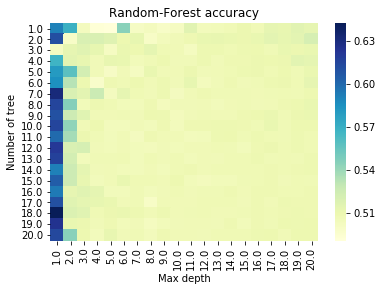

In [34]:
fig = sns.heatmap(np.matrix(m_accuracy), xticklabels=depths, yticklabels=estimators, cmap="YlGnBu")
fig.set_title("Random-Forest accuracy");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of tree");

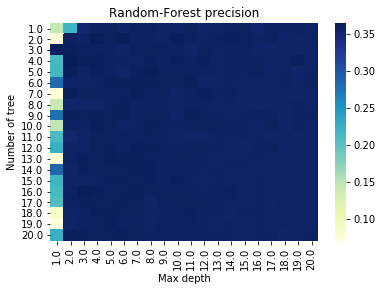

In [38]:
fig = sns.heatmap(np.matrix(m_precision), xticklabels=depths, yticklabels=estimators, cmap="YlGnBu")
fig.set_title("Random-Forest precision");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of tree");

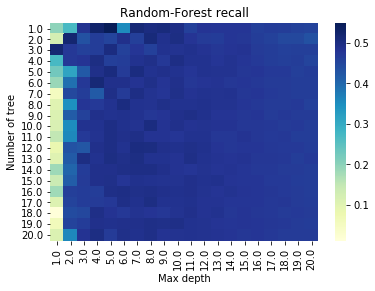

In [39]:
fig = sns.heatmap(np.matrix(m_recall), xticklabels=depths, yticklabels=estimators, cmap="YlGnBu")
fig.set_title("Random-Forest recall");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of tree");

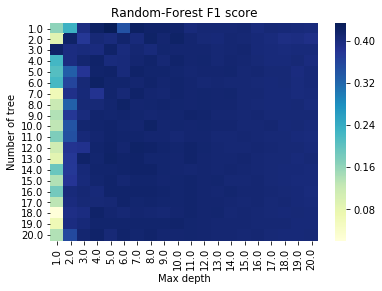

In [43]:
fig = sns.heatmap(np.matrix(m_f1_score), xticklabels=depths, yticklabels=estimators, cmap="YlGnBu")
fig.set_title("Random-Forest F1 score");
fig.set_xlabel("Max depth");
fig.set_ylabel("Number of tree");